# Jogo da Forca

### Imports de bibliotecas

In [8]:
from Forca import JogoDeForca
import random
from collections import Counter
import matplotlib.pyplot as plt

In [9]:
def jogar(jogo):
    jogo.novo_jogo()
    palavra = jogo.palavra
    palavras = [p for p in jogo.content if len(p) == len(palavra)]
    print("A palavra é:", palavra)

    letras_tentadas = set()
    letras = Counter(letra for palavra in palavras for letra in palavra)

    while jogo.vidas > 0:
        if len(palavras) == 1 or (len(palavras) > 1 and jogo.vidas == 1):
            return jogo.tentar_palavra(palavras[0] if len(palavras) == 1 else random.choice(palavras))

        letra = max((letra for letra in letras if letra not in letras_tentadas), key=letras.get)
        print("Letra atual:", letra)
        tentativa_letra = jogo.tentar_letra(letra)
        print("Tentativa:", tentativa_letra)

        if tentativa_letra:
            novas_palavras = [palavra for palavra in palavras if all(palavra[idx] == letra for idx in tentativa_letra)]
        else:
            novas_palavras = [palavra for palavra in palavras if letra not in palavra]

        palavras = novas_palavras
        print("O tamanho da lista de palavras é:", len(palavras))
        letras_tentadas.add(letra)

        letras = Counter(letra for palavra in palavras for letra in palavra if letra not in letras_tentadas)

    return None

### Simulando 1000 jogos

In [10]:
vitorias, perdas = 0,0
jogo = JogoDeForca()

for i in range(1000):
    new_game = jogar(jogo)
    
    if new_game == True :
        vitorias += 1
    else:
        perdas += 1

A palavra é: raptei
Letra atual: a
Tentativa: [1]
O tamanho da lista de palavras é: 1945
Letra atual: s
Tentativa: []
O tamanho da lista de palavras é: 1176
Letra atual: r
Tentativa: [0]
O tamanho da lista de palavras é: 82
Letra atual: i
Tentativa: [5]
O tamanho da lista de palavras é: 13
Letra atual: e
Tentativa: [4]
O tamanho da lista de palavras é: 7
Letra atual: h
Tentativa: []
O tamanho da lista de palavras é: 5
Letra atual: t
Tentativa: [3]
O tamanho da lista de palavras é: 1
Ganhou!
A palavra é: despontasse
Letra atual: a
Tentativa: [7]
O tamanho da lista de palavras é: 11650
Letra atual: r
Tentativa: []
O tamanho da lista de palavras é: 2610
Letra atual: s
Tentativa: [2, 8, 9]
O tamanho da lista de palavras é: 48
Letra atual: e
Tentativa: [1, 10]
O tamanho da lista de palavras é: 34
Letra atual: d
Tentativa: [0]
O tamanho da lista de palavras é: 33
Letra atual: c
Tentativa: []
O tamanho da lista de palavras é: 20
Letra atual: t
Tentativa: [6]
O tamanho da lista de palavras é: 

### Plotando proporção de Vitórias x Derrotas

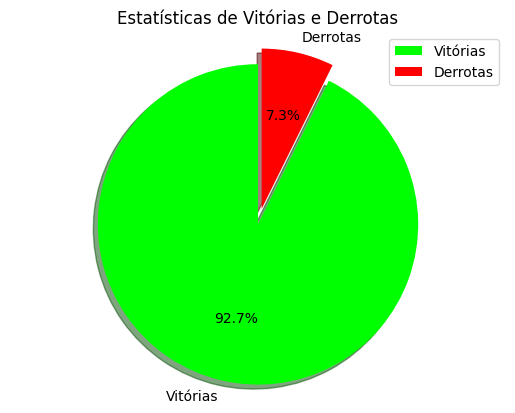

In [11]:

labels = ['Vitórias', 'Derrotas']
sizes = [vitorias, perdas]
explode = (0, 0.1)
colors = ['#00ff00', '#ff0000']  # Cores personalizadas: verde para vitórias e vermelho para derrotas

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=colors)
ax1.axis('equal')

ax1.set_title('Estatísticas de Vitórias e Derrotas')
ax1.legend(loc='upper right')

plt.show()
